# EDA (Exploratory Data Analysis)

In [33]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
warnings.filterwarnings('ignore')

Importamos la hoja 'VICTIMAS' del archivo 'homicidios.xlsx'

In [13]:
victimas = pd.read_excel('data/homicidios.xlsx', sheet_name='VICTIMAS')

In [14]:
victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


Variables cualitativas que vamos a analizar: Sexo y rol

In [25]:
rol = victimas[victimas['ROL'] != 'SD']

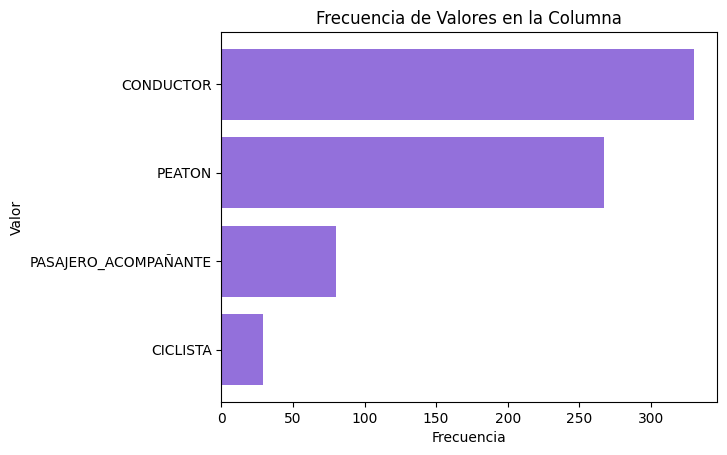

In [27]:
frecuencia = rol['ROL'].value_counts().sort_values(ascending=True)
plt.barh(frecuencia.index, frecuencia.values, color='#9370DB')
plt.xlabel('Frecuencia')
plt.ylabel('Valor')
plt.title('Frecuencia de Valores en la Columna')
plt.show()

Como podemos observar y también esperar, los roles con mayor cantidad de víctimas son conductor y peatón, también porque suele ser mucho más frecuente que circulen en las calles el conductor y peatón en lugar de un pasajero acompañante o ciclistas

In [29]:
sexo = victimas[victimas['SEXO'] != 'SD']

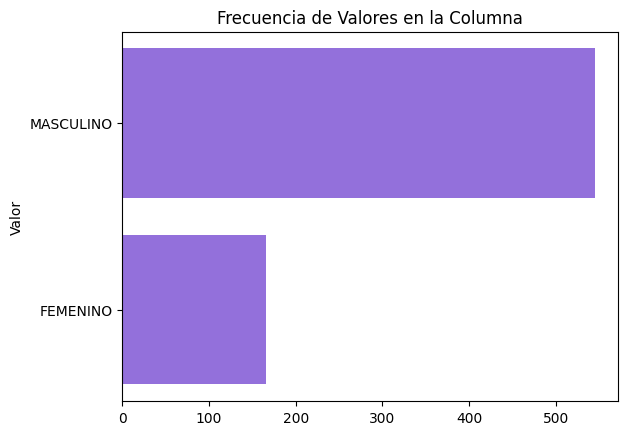

In [30]:
frecuencia = sexo['SEXO'].value_counts().sort_values(ascending=True)
plt.barh(frecuencia.index, frecuencia.values, color='#9370DB')
plt.ylabel('Valor')
plt.title('Frecuencia de Valores en la Columna')
plt.show()

Como podemos ver, las víctimas suelen ser mucho más frecuentes en el género masculino que en el femenino

Importamos el dataset 'hechos.xlsx' que transformamos en el archivo 'Transform.ipynb' y comenzamos a analizar sus primeras variables cuantitativas

In [10]:
hechos = pd.read_excel('data/hechos.xlsx', sheet_name='Sheet1')

In [12]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             696 non-null    object
 1   N_VICTIMAS     696 non-null    int64 
 2   FECHA          696 non-null    object
 3   AAAA           696 non-null    int64 
 4   MM             696 non-null    int64 
 5   DD             696 non-null    int64 
 6   HORA           696 non-null    object
 7   HH             696 non-null    object
 8   LUGAR          696 non-null    object
 9   TIPO_CALLE     696 non-null    object
 10  CALLE          696 non-null    object
 11  ALTURA         696 non-null    object
 12  CRUCE          696 non-null    object
 13  DIRECCION      696 non-null    object
 14  COMUNA         696 non-null    int64 
 15  XY_(CABA)      696 non-null    object
 16  POS_X          696 non-null    object
 17  POS_Y          696 non-null    object
 18  PARTICIPANTES  696 non-null   

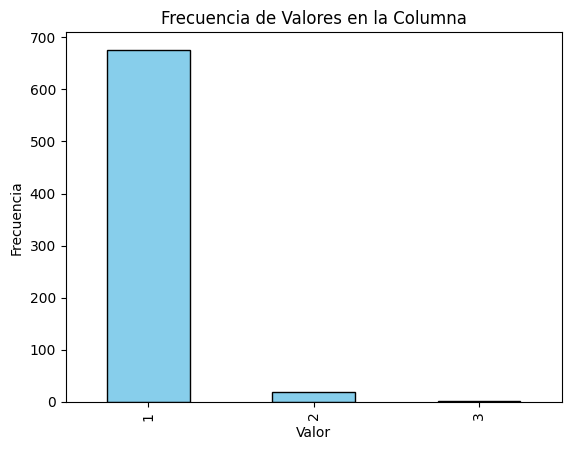

In [32]:
frecuencia = hechos['N_VICTIMAS'].value_counts()
frecuencia.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Valores en la Columna')
plt.show()

Como podemos observar, la mayor cantidad de siniestros viales suelen tener solo 1 víctima, muy pocos de ellos tienen más, siniestros con 2 o 3 víctimas parecieran ser outliers. A continuación realizaremos un boxplot para ver como se distribuye

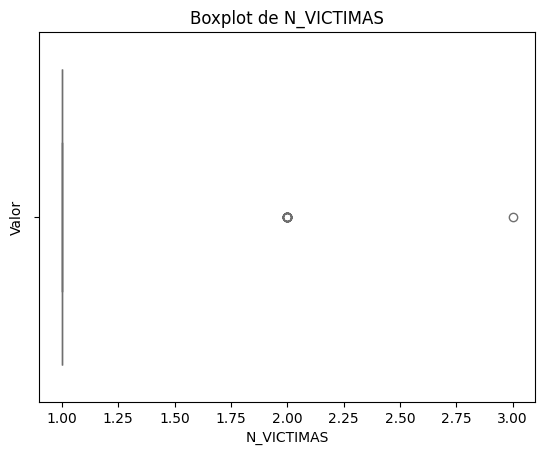

In [37]:
sns.boxplot(x='N_VICTIMAS', data=hechos, color='skyblue')
plt.xlabel('N_VICTIMAS')
plt.ylabel('Valor')
plt.title('Boxplot de N_VICTIMAS')
plt.show()

Ahora iremos a analizar la columna 'AAAA' (Año)

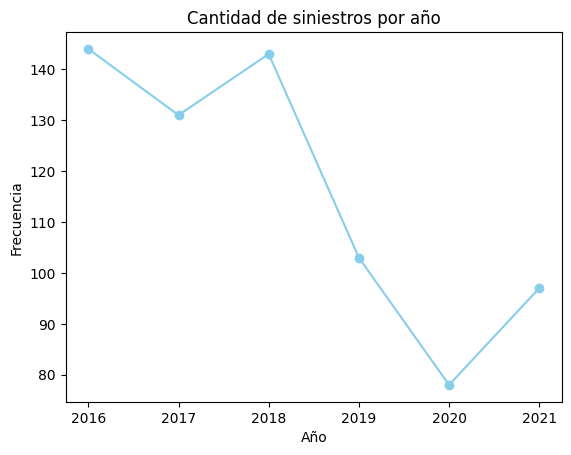

In [41]:
frecuencia = hechos['AAAA'].value_counts().sort_index()
plt.plot(frecuencia.index, frecuencia.values, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Cantidad de siniestros por año')
plt.show()

Como podemos ver, hay un claro descenso de siniestros viales entre los años 2019, 2020 y 2021. Esto muy probablemente debe deberse a la Pandemia del COVID-19 y a la cuarentena que realizó el país. Ahora procederemos a hacer un Boxplot

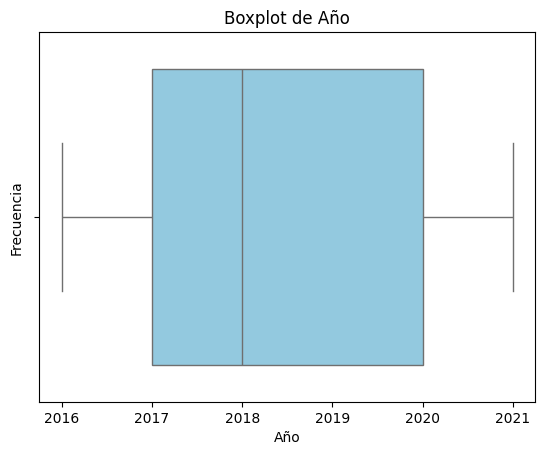

In [42]:
sns.boxplot(x='AAAA', data=hechos, color='skyblue')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Boxplot de Año')
plt.show()

Ahora analizaremos la columna 'MM' (Mes).

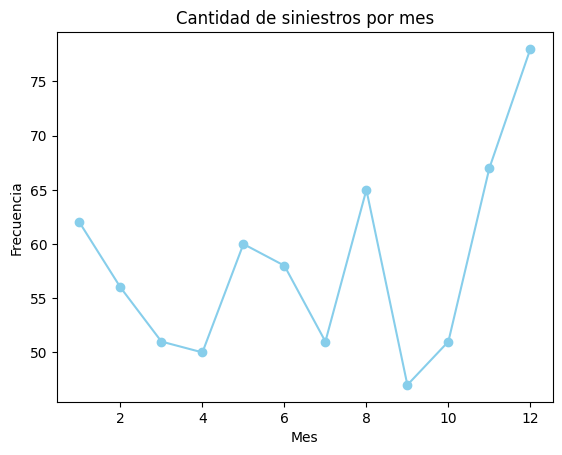

In [43]:
frecuencia = hechos['MM'].value_counts().sort_index()
plt.plot(frecuencia.index, frecuencia.values, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.title('Cantidad de siniestros por mes')
plt.show()

Pareciera no haber outliers. Podemos notar que hay un crecimiento de siniestros viales en los últimos 2 meses del año, sobre todo en Diciembre. Las fiestas (Navidad) donde mucha gente suele beber alcohol y el aumento de la circulación podrían ser una explicación para esto. Ahora haremos un Boxplot

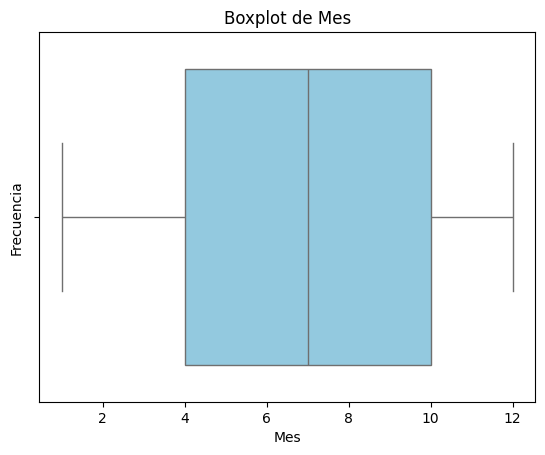

In [44]:
sns.boxplot(x='MM', data=hechos, color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.title('Boxplot de Mes')
plt.show()

Ahora analizaremos la columna 'HH' (Hora)

In [46]:
hora = hechos[hechos['HH'] != 'SD']

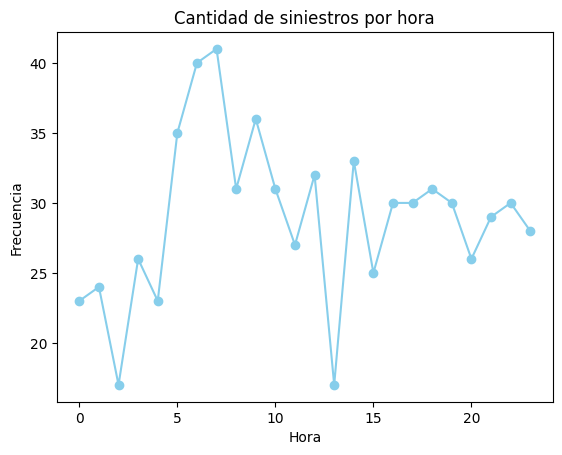

In [47]:
frecuencia = hora['HH'].value_counts().sort_index()
plt.plot(frecuencia.index, frecuencia.values, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Hora')
plt.ylabel('Frecuencia')
plt.title('Cantidad de siniestros por hora')
plt.show()

Como podemos ver, pareciera ser que la mayoría de los siniestros se concentran en las primeras horas de la mañana. Esto puede explicarse debido al gran tráfico que hay en ese momento y muy seguramente gente apurada y estresada (porque llegan tarde al trabajo o algún otro lugar)

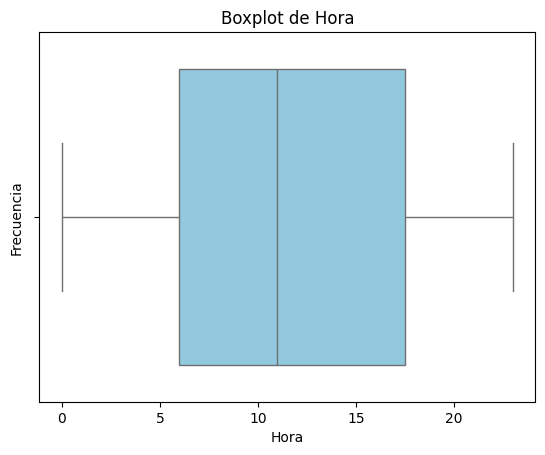

In [48]:
sns.boxplot(x='HH', data=hora, color='skyblue')
plt.xlabel('Hora')
plt.ylabel('Frecuencia')
plt.title('Boxplot de Hora')
plt.show()

Ya hemos analizado las variables cuantitativas relevantes del dataset 'hechos', ahora procederemos a analizar las variables cualitativas más relevantes

In [49]:
tipo_calle = hechos[hechos['TIPO_CALLE'] != 'SD']

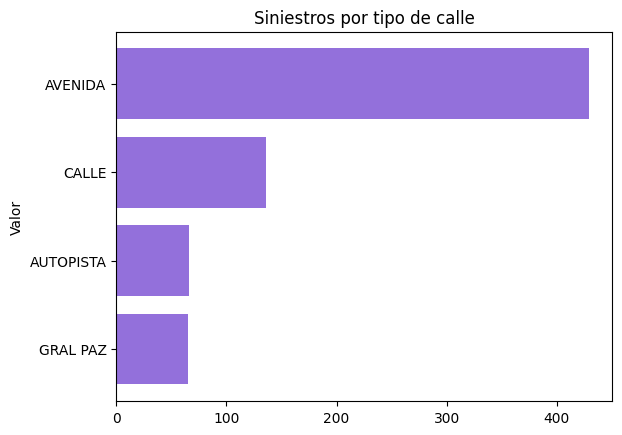

In [51]:
frecuencia = tipo_calle['TIPO_CALLE'].value_counts().sort_values(ascending=True)
plt.barh(frecuencia.index, frecuencia.values, color='#9370DB')
plt.ylabel('Valor')
plt.title('Siniestros por tipo de calle')
plt.show()

La avenida es el tipo de calle con mayor cantidad de siniestros viales, debido a que son calles muy transitadas tanto por vehículos como por peatones

In [52]:
comuna = hechos[hechos['COMUNA'] != 'SD']

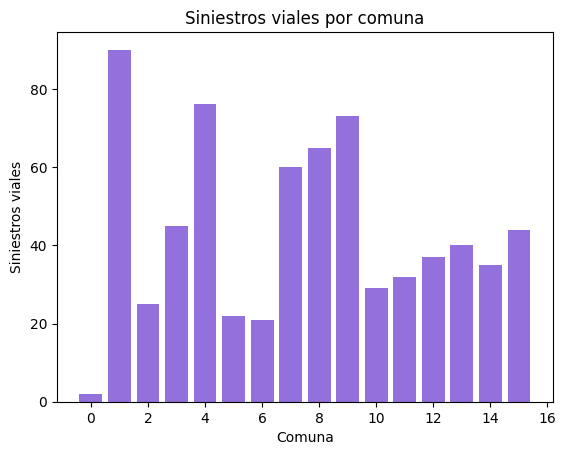

In [57]:
frecuencia = comuna['COMUNA'].value_counts().sort_index()
plt.bar(frecuencia.index, frecuencia.values, color='#9370DB')
plt.xlabel('Comuna')
plt.ylabel('Siniestros viales')
plt.title('Siniestros viales por comuna')
plt.show()

Como podemos ver la comuna 1 es la que reporta mayor cantidad de siniestros viales debido a que también es la más transitada

In [61]:
victima = hechos[hechos['VICTIMA'] != 'SD']

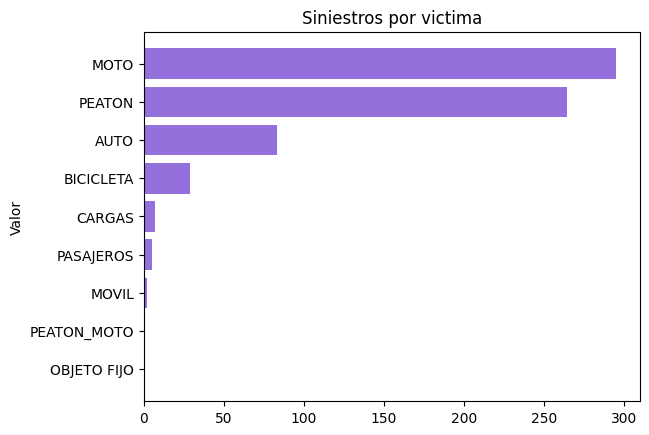

In [62]:
frecuencia = victima['VICTIMA'].value_counts().sort_values(ascending=True)
plt.barh(frecuencia.index, frecuencia.values, color='#9370DB')
plt.ylabel('Valor')
plt.title('Siniestros por victima')
plt.show()

Peatón y moto son los que se llevan la mayor cantidad de víctimas

In [60]:
acusado = hechos[hechos['ACUSADO'] != 'SD']

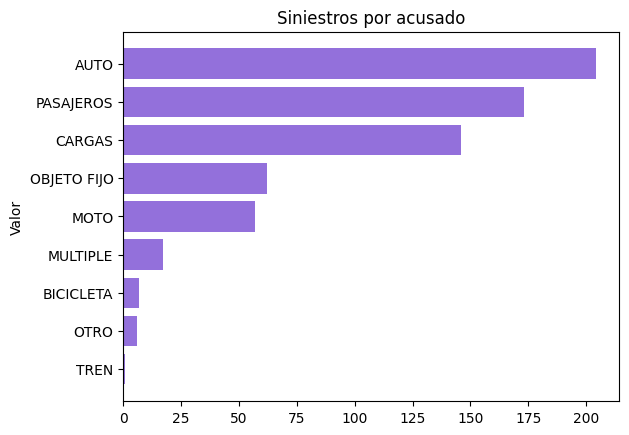

In [65]:
frecuencia = acusado['ACUSADO'].value_counts().sort_values(ascending=True)
plt.barh(frecuencia.index, frecuencia.values, color='#9370DB')
plt.ylabel('Valor')
plt.title('Siniestros por acusado')
plt.show()

El auto es el que se lleva la mayor cantidad de acusados